In [ ]:
#TRAINING
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from tensorflow.keras import Model
from tensorflow.python.keras import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
import numpy as np
with open('/content/drive/My Drive/t_pickle.pkl', 'rb') as f:
  test_data = pickle.load(f)
#r=test_data/.255

with open('/content/drive/My Drive/t_l_pickle.pkl', 'rb') as f1:
  test_label_data = pickle.load(f1)


idx2 = np.random.permutation(len(test_data))
final_test_data,final_test_label = test_data[idx2], test_label_data[idx2]

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
#print(v_transfomed_label,final_val_label)
t_transfomed_label = encoder.fit_transform(final_test_label)



In [ ]:
import tensorflow as tf

new_model = tf.keras.models.load_model('/content/drive/My Drive/saved_model1')
#new_model.summary()
loss, acc = new_model.evaluate(final_test_data,  t_transfomed_label, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

#print(new_model.predict(final_test_data).shape)



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0beb5f69b0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0beb5a8470>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0beb5a8a20> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0beb5ba1d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0beb5ba780> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0beb5baef0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0beb5c04e0> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f0beb5c0c50>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0

In [ ]:
print(new_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 128)      

Confusion Matrix :
[[30  0  0  0  0  4  0]
 [ 0 20  0  1  3  0  0]
 [ 0  0 31  0  0  0  0]
 [ 0  1  0 21  1  0  0]
 [ 0  1  0  4 16  0  0]
 [ 0  0  0  0  0 25  4]
 [ 1  0  1  0  0  2 32]]


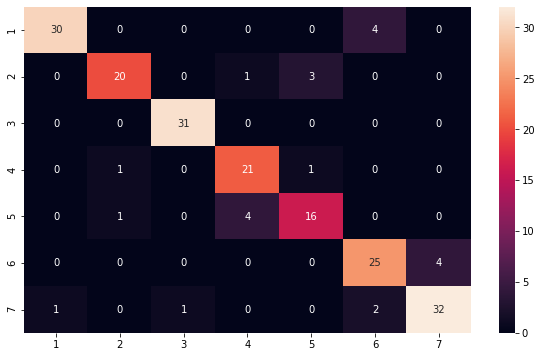

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

x=['flower1', 'flower2', 'flower3', 'flower4', 'flower5', 'flower6', 'flower7']

p=new_model.predict_classes(final_test_data)+1
p1=[]
for i in range (len(p)):
  p1.append('flower'+str(p[i]))

  
results = confusion_matrix(final_test_label, p1,labels=x)
print ('Confusion Matrix :')
print(results) 


index = ['1','2','3','4','5','6','7']  
columns = ['1','2','3','4','5','6','7']  
cm_df = pd.DataFrame(results,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)


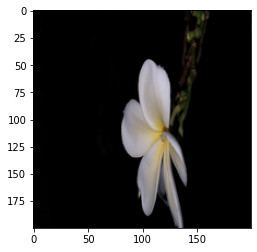

This flower belongs to class:  3
[[8.0912069e-11 5.4646939e-08 1.0312663e-12 9.9731940e-01 2.6806006e-03
  6.5760630e-10 1.3856226e-09]]


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image

img = Image.open('/content/drive/My Drive/DATA/test/flower4/20191117_171637.jpg')
img = np.asarray(img.resize((200, 200), Image.ANTIALIAS))
plt.imshow(img)
plt.show()
p = new_model.predict(np.array([img]))
#print('The probability that this is flower 1 is: ' +str(p[0][0]))
print('This flower belongs to class: ' ,(np.argmax(p)))
print(p)
